# Import Library

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score

# Load Dataset
# Dataset yang digunakan adalah datamart

In [8]:
df = pd.read_csv('Data/Data Bersih(SQL)/~DataMart.csv')
df.head()

,Unnamed: 0,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Sequence,Age,Gender,MaritalStatus,Income,ProductName,StoreName,GroupStore,Type,Latitude,Longitude
0,0,TR67501,85,2022-01-08,P4,12000,3,36000,13,1,59,1,Married,7.89,Potato Chip,Buana,Buana,General Trade,-1.26916,116.825
1,1,TR578,55,2022-07-15,P4,12000,1,12000,13,2898,34,1,Married,8.44,Potato Chip,Buana,Buana,General Trade,-1.26916,116.825
2,2,TR10955,222,2022-05-23,P4,12000,1,12000,13,2025,45,0,Married,15.03,Potato Chip,Buana,Buana,General Trade,-1.26916,116.825
3,3,TR70238,23,2022-04-14,P4,12000,2,24000,13,1178,57,1,Married,12.56,Potato Chip,Buana,Buana,General Trade,-1.26916,116.825
4,4,TR3631,168,2022-07-12,P4,12000,3,36000,13,2817,27,0,Married,4.88,Potato Chip,Buana,Buana,General Trade,-1.26916,116.825


In [9]:
df = df.drop(columns = ['Unnamed: 0'])

In [10]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Sequence,Age,Gender,MaritalStatus,Income,ProductName,StoreName,GroupStore,Type,Latitude,Longitude
0,TR67501,85,2022-01-08,P4,12000,3,36000,13,1,59,1,Married,7.89,Potato Chip,Buana,Buana,General Trade,-1.26916,116.825
1,TR578,55,2022-07-15,P4,12000,1,12000,13,2898,34,1,Married,8.44,Potato Chip,Buana,Buana,General Trade,-1.26916,116.825
2,TR10955,222,2022-05-23,P4,12000,1,12000,13,2025,45,0,Married,15.03,Potato Chip,Buana,Buana,General Trade,-1.26916,116.825
3,TR70238,23,2022-04-14,P4,12000,2,24000,13,1178,57,1,Married,12.56,Potato Chip,Buana,Buana,General Trade,-1.26916,116.825
4,TR3631,168,2022-07-12,P4,12000,3,36000,13,2817,27,0,Married,4.88,Potato Chip,Buana,Buana,General Trade,-1.26916,116.825


# EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  4945 non-null   object 
 1   CustomerID     4945 non-null   int64  
 2   Date           4945 non-null   object 
 3   ProductID      4945 non-null   object 
 4   Price          4945 non-null   int64  
 5   Qty            4945 non-null   int64  
 6   TotalAmount    4945 non-null   int64  
 7   StoreID        4945 non-null   int64  
 8   Sequence       4945 non-null   int64  
 9   Age            4945 non-null   int64  
 10  Gender         4945 non-null   int64  
 11  MaritalStatus  4945 non-null   object 
 12  Income         4945 non-null   float64
 13  ProductName    4945 non-null   object 
 14  StoreName      4945 non-null   object 
 15  GroupStore     4945 non-null   object 
 16  Type           4945 non-null   object 
 17  Latitude       4945 non-null   float64
 18  Longitud

In [12]:
df.describe()

,CustomerID,Price,Qty,TotalAmount,StoreID,Sequence,Age,Gender,Income,Latitude,Longitude
count,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000
mean,221.618605,9686.996967,3.642669,32256.825076,7.494237,2509.518301,40.320728,0.444692,8.668965,-2.937452,109.597146
std,128.426137,4605.622485,1.854737,19656.247165,4.027266,1448.492910,12.535543,0.496982,6.551818,4.323514,8.376638
min,1.000000,3200.000000,1.000000,7500.000000,1.000000,1.000000,18.000000,0.000000,0.000000,-7.797070,95.323800
25%,110.000000,4200.000000,2.000000,16000.000000,4.000000,1259.000000,31.000000,0.000000,4.250000,-6.914860,104.757000
50%,222.000000,9400.000000,3.000000,28200.000000,7.000000,2505.000000,39.000000,0.000000,7.830000,-3.654700,110.371000
75%,331.000000,15000.000000,5.000000,47000.000000,11.000000,3761.000000,51.000000,1.000000,10.840000,0.533505,114.590000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000,5020.000000,72.000000,1.000000,71.300000,5.548290,128.191000


# Mempersiapkan Data

In [13]:
df_agg = df.groupby('CustomerID').agg({
    'TransactionID' : 'count',
    'Qty' : 'sum',
    'TotalAmount' : 'sum'
}).reset_index()

In [14]:
df_agg.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


# Scaling Data

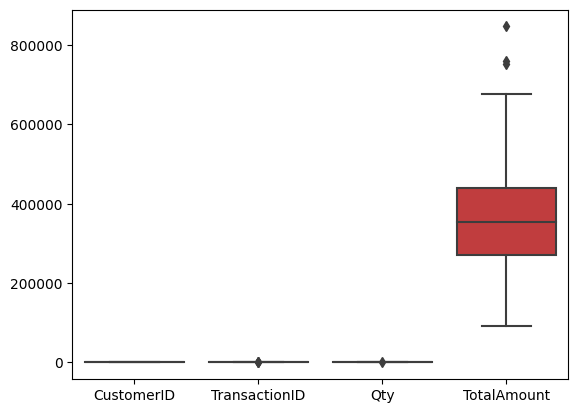

In [15]:
sns.boxplot(data=df_agg)
plt.show()

In [16]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Pilih kolom yang akan Anda skalakan (misalnya, semua kolom dalam DataFrame)
# Jika Anda ingin mengabaikan kolom tertentu, Anda dapat menggunakan df.drop()
df_scaler = df_agg.drop(columns = ['CustomerID'])

cols_to_scale = df_scaler.columns

# Lakukan standardisasi pada kolom yang dipilih
df_scaler[cols_to_scale] = scaler.fit_transform(df_scaler[cols_to_scale])

# Tampilkan hasil scaling
print(df_scaler)

     TransactionID       Qty  TotalAmount
0         1.790999  1.511666     2.108007
1         0.553020  1.274903     0.246574
2         1.172010  1.195982     0.680908
3        -0.375464  0.406774    -0.477048
4        -1.303949 -1.092723    -0.750219
..             ...       ...          ...
436       0.553020 -0.303514    -0.743773
437       2.100494  1.669508     1.740555
438       2.100494  2.143033     1.817108
439      -0.065969  0.091090     0.496377
440       0.553020  0.091090     0.625307

[441 rows x 3 columns]


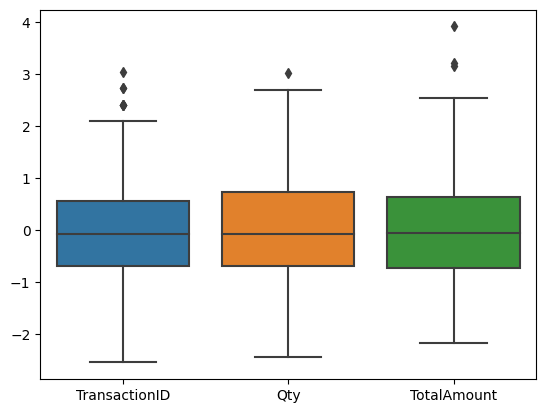

In [17]:
sns.boxplot(data=df_scaler)
plt.show()

# Cek Outlier

In [18]:
from sklearn.neighbors import LocalOutlierFactor

n_neighbors = 20

lof = LocalOutlierFactor(n_neighbors=n_neighbors)
lof_scores = lof.fit_predict(df_scaler)
outliers = lof_scores == -1

In [19]:
print("LOF Scores:", lof_scores.sum())
print("Outliers:", outliers.sum())

LOF Scores: 427
Outliers: 7


In [20]:
outlier_indices = np.where(outliers)[0]  # Mengambil indeks data outlier

# Menghapus data outlier dari DataFrame
df_scaler = df_scaler.drop(outlier_indices)

In [21]:
# Memperbarui df_result_kmeans dengan data yang telah dihapus outlier
df_agg = df_agg.iloc[df_scaler.index].copy()

In [22]:
df_agg.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


# Model

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [24]:
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia_values = []
silhouette_scores = [] 

# Melakukan k-means clustering dan menghitung inertia untuk setiap nilai K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(df_scaler)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaler, kmeans.labels_))

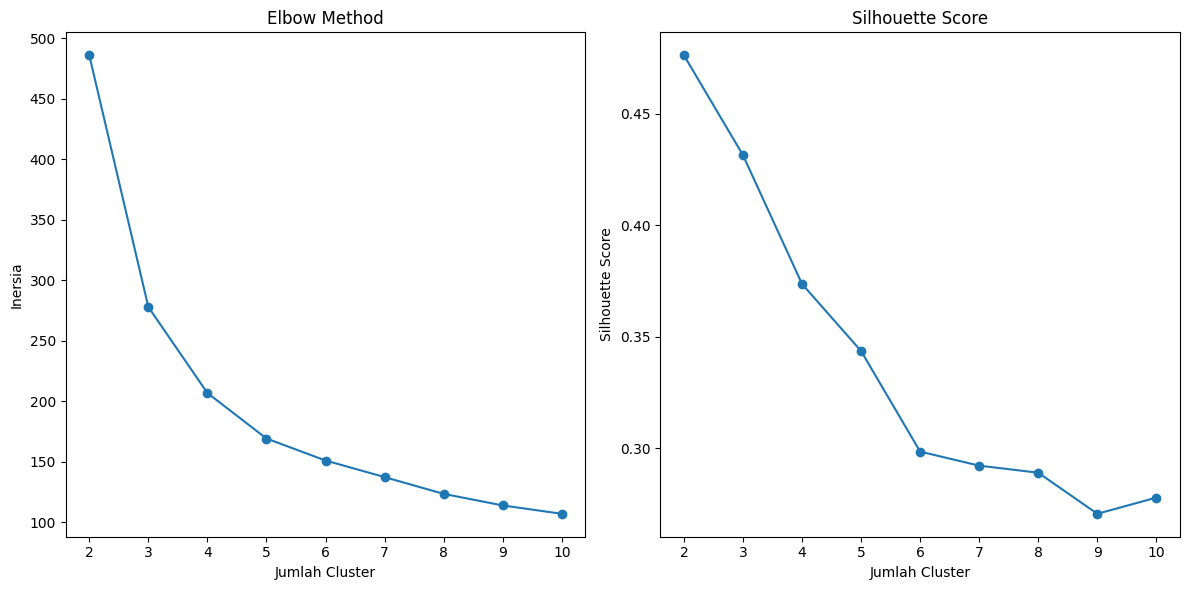

In [25]:
# Plot Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia')
plt.title('Elbow Method')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

In [26]:
pd.Series(inertia_values) - pd.Series(inertia_values).shift(-1)

0    208.068666
1     71.065486
2     37.636055
3     18.167535
4     13.712846
5     13.877749
6      9.536627
7      6.920787
8           NaN
dtype: float64

In [27]:
pd.Series(silhouette_scores) - pd.Series(silhouette_scores).shift(-1)

0    0.044778
1    0.057774
2    0.030076
3    0.045093
4    0.006304
5    0.003165
6    0.018421
7   -0.007259
8         NaN
dtype: float64

Pemilihan K
Inertia : penurunan inersia mulai melambat secara signifikan </br>
Silhoute Score : Nilai Silhouette Score berkisar dari -1 hingga 1, dan semakin mendekati 1, semakin baik

k = 3

In [28]:
kmeans = KMeans(n_clusters = 3, random_state= 42, init='k-means++').fit(df_scaler)

df_result_kmeans = df_agg.copy()
df_result_kmeans['Cluster'] = kmeans.labels_

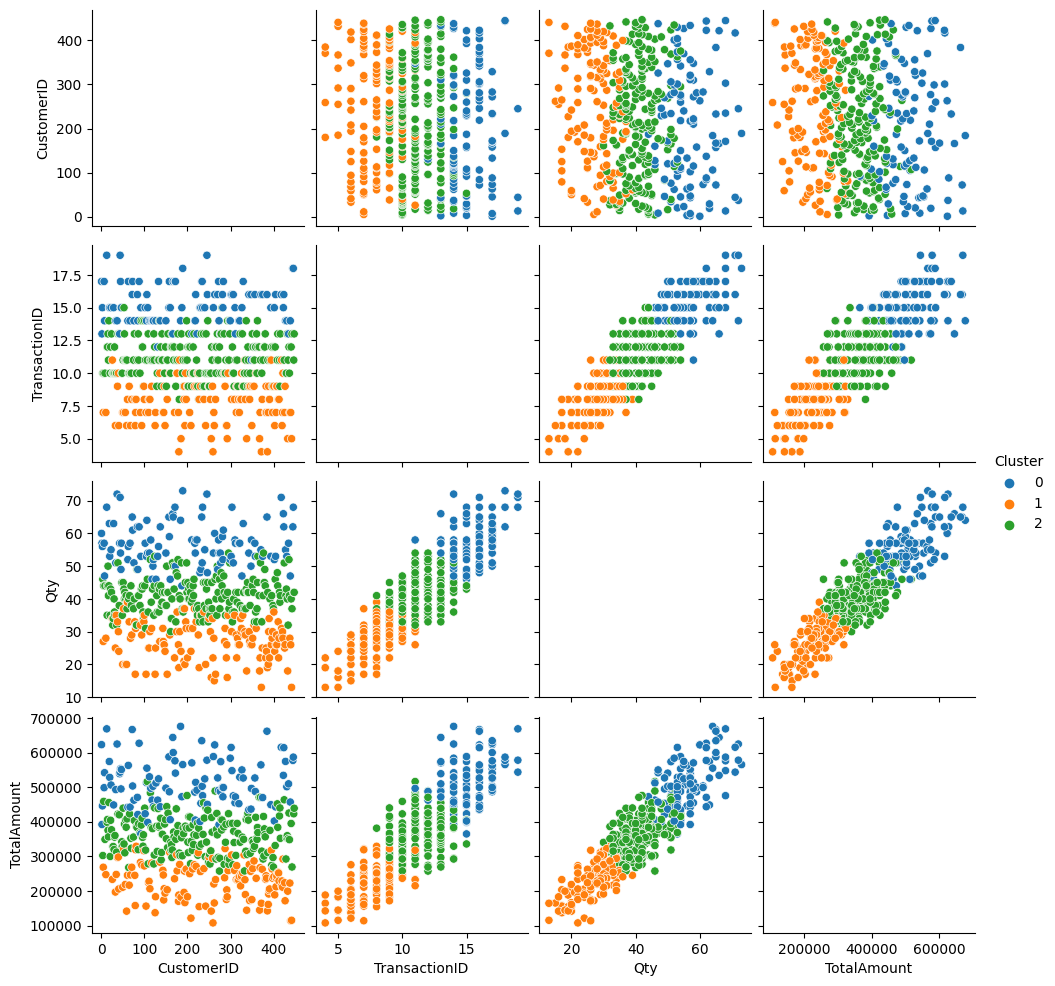

In [29]:
sns.pairplot(
    data = df_result_kmeans,
    hue = 'Cluster',
    diag_kind= 'None',
    palette= 'tab10'
)
plt.show()

In [30]:
df_result_kmeans.head()

,CustomerID,TransactionID,Qty,TotalAmount,Cluster
0,1,17,60,623300,0
1,2,13,57,392300,0
2,3,15,56,446200,0
3,4,10,46,302500,2
4,5,7,27,268600,1


# Evaluasi Model

## Inertia

In [31]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 277.81203518548733


## Silhouette Score

In [32]:
silhouette = silhouette_score(df_result_kmeans, kmeans.labels_)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.3977319674934013


## Centroid

In [33]:
centroids = kmeans.cluster_centers_
print("Centroid Klaster:", centroids)

Centroid Klaster: [[ 1.22855208  1.26655579  1.23254299]
 [-1.06060535 -1.08609609 -1.05793617]
 [ 0.0180141   0.02287706  0.00775707]]


# Visualisasi Data

In [34]:
# Quantile function
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

# Simple descriptive statistic
(
    df_result_kmeans
    .groupby('Cluster')
    .aggregate(['mean', 'std', 'min', q25, 'median', q75, 'max'])
    .transpose()
)

Cluster                           0              1              2
CustomerID    mean       205.538462     247.274809     219.020101
              std        131.466259     127.356680     125.116873
              min          1.000000       5.000000       4.000000
              q25         91.000000     143.500000     117.500000
              median     213.500000     258.000000     214.000000
              q75        307.000000     363.000000     324.500000
              max        445.000000     441.000000     447.000000
TransactionID mean        15.182692       7.786260      11.271357
              std          1.562699       1.640861       1.465679
              min         11.000000       4.000000       8.000000
              q25         14.000000       7.000000      10.000000
              median      15.000000       8.000000      11.000000
              q75         16.000000       9.000000      12.000000
              max         19.000000      11.000000      15.000000
Qty           mean        56.894231      27.083969      41.135678
              std          6.640444       5.763330       5.147980
              min         44.000000      13.000000      30.000000
              q25         52.750000      24.000000      37.000000
              median      56.500000      28.000000      41.000000
              q75         62.000000      31.000000      44.000000
              max         73.000000      39.000000      54.000000
TotalAmount   mean    514656.730769  230412.977099  362663.316583
              std      70198.388448   51311.213944   53208.111623
              min     365000.000000  107600.000000  257600.000000
              q25     462775.000000  194850.000000  318400.000000
              median  503300.000000  236700.000000  362300.000000
              q75     565000.000000  264150.000000  401050.000000
              max     676200.000000  329300.000000  516600.000000

In [38]:
# membuat kolom baru

df_result_kmeans['Segmentasi'] = 'Uknown'

df_result_kmeans.loc[df_result_kmeans['Cluster'] == 0, 'Segmentasi'] = 'Customer High Value'
df_result_kmeans.loc[df_result_kmeans['Cluster'] == 1, 'Segmentasi'] = 'Customer Low'
df_result_kmeans.loc[df_result_kmeans['Cluster'] == 2, 'Segmentasi'] = 'Customer High'

print(df_result_kmeans.head())

   CustomerID  TransactionID  Qty  TotalAmount  Cluster           Segmentasi
0           1             17   60       623300        0  Customer High Value
1           2             13   57       392300        0  Customer High Value
2           3             15   56       446200        0  Customer High Value
3           4             10   46       302500        2        Customer High
4           5              7   27       268600        1         Customer Low


In [39]:
df_result_kmeans[['Cluster', 'Segmentasi']].value_counts()

Cluster  Segmentasi         
2        Customer High          199
1        Customer Low           131
0        Customer High Value    104
Name: count, dtype: int64

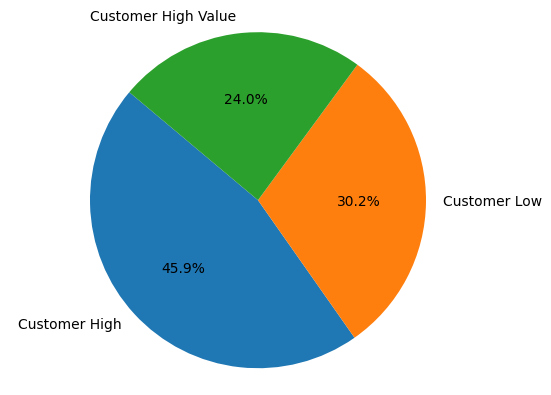

In [40]:

labels = df_result_kmeans['Segmentasi'].value_counts().index
sizes = df_result_kmeans['Segmentasi'].value_counts()

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

Terdapat 2 kategori dalam model ini yaitu High-Value dan Low-Value yang dilihat dari banyaknya produk yang dibelanjakan dan uang yang dihabiskan. 
Namun untuk mendukung hipotesis ini perlu dilakukan analisa baru yang mempertimbangkan :
1. Kapan terakhir kali pembeli melakukan transaksi (Recency)
2. Berapa banyak uang yang dihabiskan setiap customer (Monetary)
3. Seberapa sering customer melakukan transaksi (Frequency)
4. Apakah ada tanggal tertentu (Libur) atau even pada tanggal tersebut.